<a href="https://colab.research.google.com/github/Electromayonaise/Calculus-Notebooks/blob/main/EncriptacionImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

#**<big><big>Matemáticas Aplicadas ll</big></big><br><small>Depto. Matemáticas & Estadística / Facultad de Ingeniería</small><br><small> Proyecto final: Encriptación de Imágenes**
<b>Autores:</b>
* <b>MARTÍN GÓMEZ - A00399958</b>
* <b>ALEJANDRO QUIÑONES - A00377013</b>
* <b>JULIO PRADO - A00399637</b>
* <b>PABLO GUZMAN - A00399523</b>

##GITHUB LINK: https://github.com/Electromayonaise/ImageEncryption

##Proposito del proyecto

El propósito de este proyecto será lograr encriptar imágenes que estan en formato base64 mediante el cifrado de Hill usando representacion y multiplicacion de matrices.

##¿Qué conceptos son necesarios?

Teniendo en cuenta que el cifrado de Hill es un algoritmo de cifrado simétrico que utiliza matrices para transformar bloques de texto sin formato en texto cifrado, lo primero que debemos definir es la manera de transformar la imagen a un formato utilizable en el cifrado de Hill, para esto teníamos 2 opciones: El transformar cada pixel de la imagen a un valor númerico basado en su intensidad de color (Creando así una matriz representativa de la imagen que posteriormente se leería como un bloque de texto), o la opción que finalmente elegimos, el transformar la imagen a base 64. Por lo que los conceptos a desarrollar a continuación son principalmente:

- Conversión de Imagenes a base 64
- El cifrado de Hill

## Conversión de imágenes a base 64

Base 64 es un sistema de numeración posicional que usa 64 como base. Es la mayor potencia que puede ser representada usando únicamente los caracteres del alfabeto mayúsculos, minúsculos, numeros del 0 al 9 y los caracteres "/" y "+". Base64 está diseñado para transportar datos almacenados en formatos binarios a través de canales que solo admiten contenido de texto, se encuentra particularmente frecuente en páginas de internet, donde uno de sus usos es la capacidad de incrustar archivos de imágenes u otros activos binarios dentro de activos textuales como archivos HTML y CSS. De hecho, esta herramienta (colab) también lo usa al pegar imágenes de manera local, se puede observar al hacer click en la siguiente imagen:

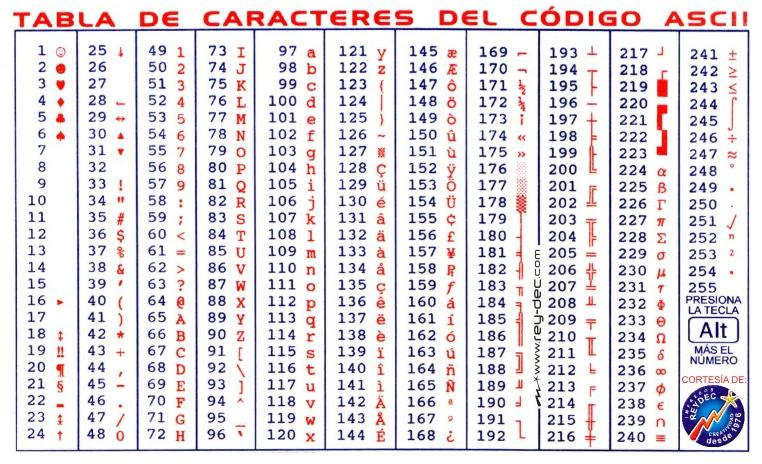

Ahora, el hecho de que queramos utilizar base 64, nos lleva a tener que realizar una importante distinción, y es que, base 64 no es un codificador de imágenes o Strings, es un codificador de bites, por lo que lo que sea que se quiere transformar, sea una imagen, un String, o un archivo mp3, toma los bites que lo componen y genera una representación en texto de ello. Muchos lenguajes de programacion tienen librerías que permiten la transformación de data a base 64, uno de ellos es python, donde el código para transformar la imagen que queremos encriptar a base 64 sería el siguiente:

In [ ]:
import base64

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        # Lee el contenido del archivo de imagen en bytes
        image_binary = image_file.read()

        # Codifica los bytes a base64
        base64_encoded = base64.b64encode(image_binary)

        # Decodifica a una cadena UTF-8
        base64_string = base64_encoded.decode("utf-8")

        return base64_string

image_path = "ruta/a/la/imagen.jpg"

#Imagen transformada a base 64
base64_data = image_to_base64(image_path)

print(base64_data)

Asimismo, el nombre base 64, proviene del hecho de que se trabajan con 64 simbolos.

## Cifrado de Hill

El cifrado de Hill es un método de cifrado en la criptografía que utiliza matrices para transformar bloques de texto en texto cifrado y viceversa. Fue propuesto por Lester S. Hill en 1929. A diferencia de algunos métodos más simples, como el cifrado César, el cifrado de Hill ofrece una mayor seguridad al trabajar con bloques de texto en lugar de caracteres individuales.


En este sistema, el texto se organiza en bloques de longitud fija, que se representan como vectores columna. Estos bloques se multiplican por una matriz clave, y el resultado se reduce módulo el tamaño del alfabeto utilizado. El cifrado de Hill es lineal y utiliza álgebra matricial para realizar la transformación.


La seguridad del cifrado de Hill depende en gran medida de la elección de la matriz clave. La matriz debe ser invertible, y la clave debe mantenerse en secreto para garantizar la confidencialidad del mensaje cifrado. La clave sirve tanto para encriptar como para desincriptar el mismo mensaje.

###Resumen del cifrado de hill:

####Encriptación:

1. Se selecciona un mensaje
2. Se transforma cada caracter del mensaje en un número de acuerdo a un diccionario
3. Se dividen los caracteres de el mensaje en bloques de igual longitud
4. Cada bloque representará una columna en la matriz, y habrán tantas filas como la longitud de los bloques
5. Se contruye una matriz clave de la misma dimensión de filas de la matriz del mensaje, la cual debe cumplir las condiciones
6. Se multiplica la matriz llave por la matriz del mensaje
7. La matriz resultante la llamaremos A'
8. Ahora a la matriz A' se le calcula el modulo de la longitud del diccionario
9. Eso nos da la matriz $A' mod X$ (donde x es la longitud del diccionario)
10. Dicha matriz se escribe en forma horizontal, como si fuera un mensaje de numeros
11. A cada número se le asigna su correspondiente según el diccionario, y eso sería el mensaje encriptado

####Desencriptación:

1. Se codifica el mensaje recibido (se asigna su correspondiente de acuerdo al diccionario)
2. Se reparte el mensaje codificado en bloques del mismo tamaño de la codificación (tamaño de la matriz llave)
3. Se introduce en la matriz B donde cada bloque es una columna, y hay tantas filas como la longitud de los bloques
4. Se calcula la matriz inversa de la llave
5. Se calcula el modulo de la longitud del diccionario a la matriz inversa de la llave
6. Eso nos da la matriz C^-1 mod X (donde x es la longitud del diccionario)
7. Dicha matriz $(C^{-1} modX)$ se multiplica por la matriz B
8. Se calcula el modulo de la longitud del diccionario a la matriz resutante de la multiplicación $(C^{-1} modX)*B)modX)$
9. La matriz resultante  $((C^{-1} modX)*B)modX)$ se escribe en forma horizontal, como si fuera un mensaje de numeros
10.  Se traduce de acuerdo al diccionario


##Selección de la matriz de encriptación

Para el uso de la matriz clave se requiere que esta tenga los siguientes requerimientos:

1. Debe ser cuadrada
2. Ser invertible
3. Determinante no nulo
4. No debe tener factores comunes con el tamaño del alfabeto

####Matriz cuadrada
La matriz clave debe ser cuadrada, lo que significa que el número de filas debe ser igual al número de columnas. Esto es necesario para que la multiplicación de matrices sea posible.

$$A = \begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 3 \\
1 & 2 & 3
\end{bmatrix}$$
$$  n*n$$

####Matriz invertible
Se requiere que la matriz de encriptación "A" sea invertible. Esto significa que debe existir otra matriz $A^{-1}$, tal que al ser multiplicada por la matriz original, de como resultando una matriz identidad. Una matriz identidad de dimensión n, es una matriz cuadrada que cuenta con 1's en la diagonal principal y 0's en las demás otras partes.



$$A \cdot A^{-1} = I$$


$$I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}$$

####Matriz determinante diferente de nulo
El determinante de la matriz clave está relacionado con su invertibilidad. Una matriz es invertible si y solo si su determinante es diferente de cero

$$A = \begin{bmatrix}
3 & 2  \\
6 & 5
\end{bmatrix} = (3*5) - (6*2) = (15) - (12) = 3 $$

####El determinante de la matriz no debe tener factores comunes con el tamaño del alfabeto

Si el determinante de la matriz clave tiene factores comunes con el tamaño del alfabeto, no se puede hacer el proceso correctamente.

## Procedimiento

Para encriptar un mensaje con el cifrado de Hill, primero se debe dividir el mensaje en bloques de tamaño n, donde n es el tamaño de la matriz de encriptación. Cada bloque es representado como un vector de n elementos y posteriormente multiplicado por la matriz de enctriptación. El resultado es otro vector de tamaño n que representa el mensaje encriptado.



\begin{equation}
cifrado=
\begin{bmatrix}
K11 & K12 & K13 & K14 \\
K21 & K22 & K23 & K24 \\
K31 & K32 & K33 & K34  \\
K41 & K42 & K43 & K44 \\
\end{bmatrix}*\begin{bmatrix}
m_1 \\
m_2 \\
m_3  \\
m_4 \\
\end{bmatrix} =  \begin{bmatrix}
c_1 \\
c_2 \\
c_3  \\
c_4 \\
\end{bmatrix}
\end{equation}


Luego, con la matriz encriptada podemos hacer el modulo del tamaño del alfabeto con cada uno de los vectores de la matriz para obtener el nuevo encriptado mensaje.

\begin{align*}
\begin{bmatrix}
38 & 7 & 14  & 14\\
17 & 3 & 43 & 44 \\
45 & 6 & 1 & 20 \\
17 & 14 & 45 & 43 \\
\end{bmatrix}
&*\begin{bmatrix}
0\\
20\\
0\\
2
\end{bmatrix}=(\begin{bmatrix}
6\\
13\\
25\\
15
\end{bmatrix}) * mod 27=\begin{bmatrix}
G\\
N\\
Y\\
O
\end{bmatrix}
\end{align*}


En este punto identificamos dos posibles percances, el primero siendo el tamaño de la matriz, pues como podemos ver el String representante de una imagen en base64 es de un tamaño considerable, y las matrices en el cifrado de Hill son normalmente de un tamaño reducido, por ello, encriptaremos imágenes de un tamaño definido. Y el segundo siendo la propia naturaleza alfanumerica de base 64, pues al aplicarle el cifrado de hill, se perdería que era originalmente un caracter y que era originalmente un número, para solucionar esto basta con agregar los números al diccionario que transforma las letras, de manera que se "tenga un registro" de que era originalmente números, y al desencriptarce no pasen a letras.

Para desencriptar el mensaje, se usa el mismo proceso, pero en lugar de multiplicar el mensaje encriptado por la matriz de encriptación, se multiplica por el inverso de la misma.

$$Descifrado= \begin{bmatrix}
K_{11}^{-1} & K_{12}^{-1} & K_{13}^{-1} & K_{14}^{-1} \\
K_{21}^{-1} & K_{22}^{-1} & K_{23}^{-1} & K_{24}^{-1} \\
K_{31}^{-1} & K_{32}^{-1} & K_{33}^{-1} & K_{34}^{-1} \\
K_{41}^{-1} & K_{42}^{-1} & K_{43}^{-1} & K_{44}^{-1}
\end{bmatrix} * \begin{bmatrix}
c_1 \\
c_2 \\
c_3 \\
c_4 \\
\end{bmatrix} = \begin{bmatrix}
m_1 \\
m_2 \\
m_3 \\
m_4 \\
\end{bmatrix}
$$



De tal forma que el mensaje seria igual a $M = (K^-1 * c) *  Mod A$

$$KT'=\begin{bmatrix}
9639*14 & 2107*14 & -637*14 & -4989*14 \\
-5198*14 & -26784*14 & 4264*14 & 27116*14 \\
18073*14 & 4600*14 & -15769*14 & -3266*14 \\
-21032*14 & 3064*14 & 15386*14 & 3274*14
\end{bmatrix} mod (27)=\begin{pmatrix}
0 & 14 & 19 & 12 \\
20 & 0 & 26 & 4 \\
5 & 23 & 13 & 14 \\
14 & 20 & 15 & 17
\end{pmatrix}$$


Ahora con la matriz inversa, se puede desencriptar el mensaje

$$K' = \begin{pmatrix}
0 & 14 & 19 & 12 \\
20 & 0 & 26 & 4 \\
5 & 23 & 13 & 14 \\
14 & 20 & 15 & 17
\end{pmatrix}*\begin{pmatrix}
G \\
N \\
Y \\
O\\
\end{pmatrix}=\begin{pmatrix}
A \\
T \\
A \\
C\\
\end{pmatrix}$$


**Procedimiento de ejemplo**

*ENCRIPTACIÓN*

1) Supongamos que la imagen a encriptar tiene la siguiente representación en base 64.

$$img= |K |A |0 |h |+ |w|/| C |B | L| n| o|$$

2)Se transformará esa imagen a una secuencia numérica utilizando el siguiente diccionario.

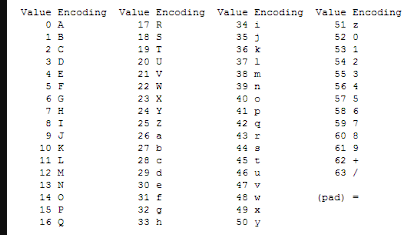

$$img= 10| 0 |52| 33| 62|48| 63| 2| 1|11|39|40|$$

3) Se agrupan los valores de la imagen en vectores de las dimensiones que se quieran. En este caso lo vamos a hacer de 3

$$V_1=(10,0,52)$$
$$V_2=(33,62,48)$$
$$V_3=(63,2,1)$$
$$V_4=(11,39,40)$$

4) Se construye una matriz en la que cada vector puede ser fila o columna.

Si se elige vector fila, entonces el tamaño de nuestra matriz de encriptación debe ser igual a la cantidad total de vectores. Si se elige vector columna entonces  el tamaño de la matriz de encriptación debe ser igual a la cantidad de dimensiones del vector.
En este caso se hará con vectores columna.

$$M = \begin{pmatrix}
10 & 33 & 63 & 11 \\
0 & 62 & 2 & 39 \\
52 & 48 & 1 & 40 \\
\end{pmatrix}$$

5) Ahora, dado que la multiplicación de matrices  $A*B$, solo está definida cuando el numero de columnas de A es igual al numero de filas  de B. Se tiene que buscar una matriz de encriptación con de $3*3$, dado que B tiene 3 filas.

$$K = \begin{pmatrix}
10 & 3 & 22  \\
15 & 20 & 1 \\
17 & 8 & 0 \\
\end{pmatrix}$$

Para ver si es invertible se calculará su determinante.


$$|K|=10* (20*0 -1*8) - 3*(15*0-1*17)+22*(15*8-20*17)$$
$$|K|=10* (-1*8) - 3*(-1*17)+22*(15*8-20*17)$$
$$|K|=10* (-8) - 3*(-17)+22*(-220)$$
$$|K|=-80+ 51-4840$$
$$|K|=-4869$$

Es diferente de 0, por tanto sí es invertible, ademas dicho determinante no tiene factores en comun con la base numerico con la que se trabaja

6) Multiplicamos la matriz lave por la matriz de encriptación, y ese resultado será nuestra matriz encriptada

$$M'= K*M$$
$$M'=(\begin{pmatrix}
10 & 3 & 22  \\
15 & 20 & 1 \\
17 & 8 & 0 \\
\end{pmatrix} *\begin{pmatrix}
10 & 33 & 63 & 11 \\
0 & 62 & 2 & 39 \\
52 & 48 & 1 & 40 \\
\end{pmatrix}) mod 64$$

Para la multiplicación hace el producto escalar entre cada vector fila de K por cada vector columna de M


\begin{align*}
M'_{0,0} &= (10,3,22) \cdot (10,0,52) = 10 \cdot 10 + 3 \cdot 0 + 22 \cdot 52 = 1244 \\
M'_{0,1} &= (10,3,22) \cdot (33,62,48) = 10 \cdot 33 + 3 \cdot 62 + 22 \cdot 48 = 1572 \\
M'_{0,2} &= (10,3,22) \cdot (63,2,1) = 10 \cdot 63 + 3 \cdot 2 + 22 \cdot 1 = 658 \\
M'_{0,3} &= (10,3,22) \cdot (11,39,40) = 10 \cdot 11 + 3 \cdot 39 + 22 \cdot 40 = 1107 \\
\end{align*}



\begin{align*}
M'_{1,0} &= (15,20,1) \cdot (10,0,52) = 15 \cdot 10 + 20 \cdot 0 + 1 \cdot 52 = 202 \\
M'_{1,1} &= (15,20,1) \cdot (33,62,48) = 15 \cdot 33 + 20 \cdot 62 + 1 \cdot 48 = 1783 \\
M'_{1,2} &= (15,20,1) \cdot (63,2,1) = 15 \cdot 63 + 20 \cdot 2 + 1 \cdot 1 = 986 \\
M'_{1,3} &= (15,20,1) \cdot (11,39,40) = 15 \cdot 11 + 20 \cdot 39 + 1 \cdot 40 = 985 \\
\end{align*}


\begin{align*}
M'_{2,0} &= (17,8,0) \cdot (10,0,52) = 17 \cdot 10 + 8 \cdot 0 + 0 \cdot 52 = 170 \\
M'_{2,1} &= (17,8,0) \cdot (33,62,48) = 17 \cdot 33 + 8 \cdot 62 + 0 \cdot 48 = 1057 \\
M'_{2,2} &= (17,8,0) \cdot (63,2,1) = 17 \cdot 63 + 8 \cdot 2 + 0 \cdot 1 = 1087 \\
M'_{2,3} &= (17,8,0) \cdot (11,39,40) = 17 \cdot 11 + 8 \cdot 39 + 0 \cdot 40 = 499 \\
\end{align*}

Posicionamos todos estos productos escalares.

$$M'=(\begin{pmatrix}
1244 & 1572 & 658 & 1107  \\
202 & 1783 & 986 & 985 \\
170 & 1057 & 1087 &499 \\
\end{pmatrix}) mod 64$$

La operación de modulo aplicada en matrices consiste en simplemente sacarle modulo a cada una de las entradas de la matriz

$M' = \begin{pmatrix}
1244 & 1572 & 658 & 1107  \\
202 & 1783 & 986 & 985 \\
170 & 1057 & 1087 &499 \\
\end{pmatrix} \mod 64 = \begin{pmatrix}
1244 \mod 64 & 1572 \mod 64 & 658 \mod 64 & 1107 \mod 64  \\
202 \mod 64 & 1783 \mod 64 & 986 \mod 64 & 985 \mod 64 \\
170 \mod 64 & 1057 \mod 64 & 1087 \mod 64 & 499 \mod 64 \\
\end{pmatrix} $





$$=  \begin{pmatrix}
28 & 36 & 18 & 19  \\
10 & 55 & 26 & 25 \\
42 & 33 & 63 & 51 \\
\end{pmatrix}$$

7) Reconstrucción de los vectores

$$V_1'=(28,10,42)$$
$$V_2'=(36,55,33)$$
$$V_3'=(18,26,63)$$
$$V_4'=(19,25,51)$$

$$img'=|28|10|42|36|55|33|18|26|63|19|25|51|$$

$$img'=|c|K|q|k|3|h|S|a|/|T|Z|z|$$

$$img'=cKqk3hSa/TZz$$

*Desencriptación*

$$img'=|c|K|q|k|3|h|S|a|/|T|Z|z|$$

1) Se traducirían los simbolos a su valor numerico, usando el diccionario.

$$img'=|28|10|42|36|55|33|18|26|63|19|25|51|$$

2) Se construirian los vectores

$$V_1'=(28,10,42)$$
$$V_2'=(36,55,33)$$
$$V_3'=(18,26,63)$$
$$V_4'=(19,25,51)$$

3) Se construiria la matriz

$$M'=  \begin{pmatrix}
28 & 36 & 18 & 19  \\
10 & 55 & 26 & 25 \\
42 & 33 & 63 & 51 \\
\end{pmatrix}$$

4) Ahora necesitariamos hallar la matriz inversa de nuestra llave

$$K = \begin{pmatrix}
10 & 3 & 22  \\
15 & 20 & 1 \\
17 & 8 & 0 \\
\end{pmatrix}$$

Para esto se aplicará el metodo de Gauss Jordan.

$$\begin{pmatrix}
10 & 3 & 22  | & 1 & 0 & 0\\
15 & 20 & 1 | &  0 & 1 & 0\\
17 & 8 & 0 | &  0 & 0 & 1\\
\end{pmatrix}$$

Se va a dividir entre 10 la primera fila.


$$f_1=f_1/10$$

$$\begin{pmatrix}
10/10 & 3/10 & 22/10  | & 1/10 & 0/10 & 0/10\\
15 & 20 & 1 | &  0 & 1 & 0\\
17 & 8 & 0 | &  0 & 0 & 1\\
\end{pmatrix}$$



$$\begin{pmatrix}
1 & 3/10 & 22/10  | & 1/10 & 0 & 0\\
15 & 20 & 1 | &  0 & 1 & 0\\
17 & 8 & 0 | &  0 & 0 & 1\\
\end{pmatrix}$$

Ahora a la fila 2 se le va a sumar -15* fila 1 para obtener 0

$$ f2=f2-15*f1$$

$$-15*f1=\begin{pmatrix}
-15 & -45/10 & -330/10|  & -15/10 &0 &0
\end{pmatrix}=\begin{pmatrix}
-15 & -9/2 & -33|  & -3/2 &0 &0
\end{pmatrix}$$

$$f2=\begin{pmatrix}
15 & 20 & 1|  & 0&1 &0
\end{pmatrix}+\begin{pmatrix}
-15 & -9/2 & -33| & -3/2&0 &0
\end{pmatrix}$$

$$f2=\begin{pmatrix}
0 & 31/2 & -32|  & -3/2&1 &0
\end{pmatrix}$$

Así va quedando

$$\begin{pmatrix}
1 & 3/10 & 22/10  | & 1/10 & 0 & 0\\
0 & 31/2 & -32|  & -3/2&1 &0\\
17 & 8 & 0 | &  0 & 0 & 1\\
\end{pmatrix}$$

Lo mismo con la fila 3

$$f3=f3+ (-17*f1)$$

$$-17*f1=\begin{pmatrix}
-17 & -51/10 & -374/10|  & -17/10 &0 &0
\end{pmatrix}=\begin{pmatrix}
-17 & -51/10 & -187/5|  & -17/10 &0 &0
\end{pmatrix}$$

$$f3=\begin{pmatrix}
0 & 29/10 & -187/5|  & -17/10 &0 &1
\end{pmatrix}$$

Asi va quedando

$$\begin{pmatrix}
1 & 3/10 & 22/10  | & 1/10 & 0 & 0\\
0 & 31/2 & -32|  & -3/2&1 &0\\
0 & 29/10 & -187/5|  & -17/10 &0 &1
\end{pmatrix}$$

Ahora queremos un 1 en el centro de la matriz

$$f2=f2*\frac{2}{31}$$
$$f2=\begin{pmatrix}
0 & 1 & -64/31|  & -3/31 &2/31 &0
\end{pmatrix}$$

Asi va quedando

$$\begin{pmatrix}
1 & 3/10 & 22/10  | & 1/10 & 0 & 0\\
0 & 1 & -64/31|  & -3/31 &2/31 &0\\
0 & 29/10 & -187/5|  & -17/10 &0 &1
\end{pmatrix}$$

Ese 1 me servira para poner los ceros de la columna 2

$f1=f1+(-\frac{3}{10}*f2)$

$f2\frac{-3}{10}=\begin{pmatrix}
0 & -3/10 & 96/155|  & 9/310 &-3/155 &0
\end{pmatrix}$$$

$f3=\begin{pmatrix}
1 & 0 & 437/155|  & 4/31 &-3/155 &0
\end{pmatrix}$

Así va quedando

$$\begin{pmatrix}
1 & 0 & 437/155|  & 4/31 &-3/155 &0\\
0 & 1 & -64/31|  & -3/31 &2/31 &0\\
0 & 29/10 & -187/5|  & -17/10 &0 &1
\end{pmatrix}$$

Ahora el cero de la columna 2 fila 3

$$f3=f3+(\frac{-29}{10}f2)$$

$f2\frac{-29}{10}=\begin{pmatrix}
0 & -29/10 & 928/155|  & 87/310 &-29/155 &0
\end{pmatrix}$$$

$f3=\begin{pmatrix}
0 & 0 & -4869/155|  & -44/31 &-29/155 &1
\end{pmatrix}$$$

Así va quendando.

$$\begin{pmatrix}
1 & 0 & 437/155|  & 4/31 &-3/155 &0\\
0 & 1 & -64/31|  & -3/31 &2/31 &0\\
0 & 0 & -4869/155|  & -44/31 &-29/155 &1
\end{pmatrix}$$

Ponemos un uno donde nos falta

$f3=\frac{-155}{4869}f3$

$f3=\begin{pmatrix}
0 & 0 & 1|  & 220/4869 & 29/4869 &-155/4869
\end{pmatrix}$$$

Asi va quedando

$$\begin{pmatrix}
1 & 0 & 437/155|  & 4/31 &-3/155 &0\\
0 & 1 & -64/31|  & -3/31 &2/31 &0\\
0 & 0 & 1|  & 220/4869 & 29/4869 &-155/4869
\end{pmatrix}$$

Usamos ese 1 para eliminar poner ceros en la columna 3

$f1=f1+(\frac{-437}{155}f3)$

$$f3\frac{-437}{155}=\begin{pmatrix}
0 & 0 & -437/155|  & -19228/150939 &-12673/954695 & 437/869
\end{pmatrix}$$

$$f1\frac{-437}{155}=\begin{pmatrix}
1 & 0 & 0|  & 8/4869 &-176/4869 & 437/4869
\end{pmatrix}$$

Quedaría asi

$$\begin{pmatrix}
1 & 0 & 0|  & 8/4869 &-176/4869 & 437/4869\\
0 & 1 & -64/31|  & -3/31 &2/31 &0\\
0 & 0 & 1|  & 220/4869 & 29/4869 &-155/4869
\end{pmatrix}$$

Repitiendo el proceso con el otro cero el resultado es el siguiente

$$\begin{pmatrix}
1 & 0 & 0|  & 8/4869 &-176/4869 & 437/4869\\
0 & 1 & 0|  & -17/4869 &374/4869 &-320/4869\\
0 & 0 & 1|  & 220/4869 & 29/4869 &-155/4869
\end{pmatrix}$$

Tendríamos que la matriz inversa de K es la siguiente.

$$K^{-1}=\begin{pmatrix}
8/4869 &-176/4869 & 437/4869\\
-17/4869 &374/4869 &-320/4869\\
220/4869 & 29/4869 &-155/4869
\end{pmatrix}$$

Ahora el problema es que las entradas de la matriz no son numeros enteros, por lo que hay que aplicarles ciertas operaciones

5) Ahora se necesita el inverso multiplicativo modulo 64 de 4869. El resultado de este es 13, dado que (4869*13) mod 64 =1.

A todas esas entradas de nuestra matriz llave la vamos a multiplicar por 4869*13.

$$K'=\begin{pmatrix}
104 &-2288 & 5681\\
-221 &4862 &-4160\\
2860 & 377 &-2015
\end{pmatrix}$$

6) Ahora le sacamos el modulo 64

$$K'=\begin{pmatrix}
40 & 16 & 49\\
35 &62 &0\\
44 & 57 & 33
\end{pmatrix}$$

7) Multiplicamos k' por el mensaje encriptado.

$$M= (\begin{pmatrix}
40 & 16 & 49\\
35 &62 &0\\
44 & 57 &- 33
\end{pmatrix}* \begin{pmatrix}
28 & 36 & 18 & 19  \\
10 & 55 & 26 & 25 \\
42 & 33 & 63 & 51 \\
\end{pmatrix}) mod 64 $$

$$M=(\begin{pmatrix}
3338 & 3937 & 4223 &3659\\
1600 &4670 &2242& 2215\\
3188 & 5808 & 4353 & 3944
\end{pmatrix})mod 64$$

$$M=(\begin{pmatrix}
10 & 33 & 63& 11\\
0 &62 &2 & 39\\
52 & 48 & 1 & 40
\end{pmatrix})$$

8) Reconstruimos el la imagen base 64

$img=10|0|52|33|62|48|63|2|1|11|39|40$

$$img= |K |A |0 |h |+ |w|/| C |B | L| n| o|$$

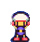

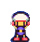